In [ ]:
from google.colab import drive
import zipfile
import os

#Mount Google Drive
drive.mount('/content/drive')

#Paths
zip_path = "/content/drive/MyDrive/deep_dataset.zip"
extract_path = "/content/drive/MyDrive"
dataset_path = "/content/drive/MyDrive/deep_dataset"

#Extract only once
if not os.path.exists(dataset_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully into MyDrive!")
else:
    print("Dataset already exists in MyDrive. Skipping extraction.")


Mounted at /content/drive
Dataset already exists in MyDrive. Skipping extraction.


In [ ]:
!ls /content/drive/MyDrive/deep_dataset

building  car  lab  person  tree


In [ ]:
BASE_DIR = "/content/drive/MyDrive/deep_dataset"
classes = ['building', 'car', 'lab', 'person', 'tree']

print("File extensions per class:\n")

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"{cls}: Folder not found")
        continue

    exts = {
        os.path.splitext(f)[1].lower()
        for f in os.listdir(cls_path)
        if os.path.isfile(os.path.join(cls_path, f)) and not f.startswith('.')
    }

    print(f"{cls}: {exts}")


File extensions per class:

building: {'.jpg', '.png'}
car: {'.jpeg', '.jpg'}
lab: {'.jpg'}
person: {'.jpg'}
tree: {'.jpg'}


In [ ]:
!pip install pillow-heif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.9 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import pillow_heif

pillow_heif.register_heif_opener()

BASE_DIR = "/content/drive/MyDrive/deep_dataset"
classes = ['building', 'car', 'lab', 'person', 'tree']

converted_count = 0
error_count = 0

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"⚠️ Folder not found: {cls_path}")
        continue

    for fname in os.listdir(cls_path):
        if fname.lower().endswith((".heic", ".heif")):
            old_path = os.path.join(cls_path, fname)
            new_path = os.path.join(
                cls_path,
                os.path.splitext(fname)[0] + ".jpg"
            )

            try:
                with Image.open(old_path) as img:
                    img = img.convert("RGB")
                    img.save(new_path, "JPEG", quality=95)

                # نحذف الملف الأصلي فقط بعد نجاح الحفظ
                if os.path.exists(new_path):
                    os.remove(old_path)
                    converted_count += 1
                else:
                    print(f"❌ Conversion failed for {fname}")

            except Exception as e:
                error_count += 1
                print(f"❌ Error with {fname}: {e}")

print(f"\n✅ HEIC / HEIF conversion completed!")
print(f"🖼️ Converted images: {converted_count}")
print(f"⚠️ Errors: {error_count}")



✅ HEIC / HEIF conversion completed!
🖼️ Converted images: 0
⚠️ Errors: 0


In [ ]:
BASE_DIR = "/content/drive/MyDrive/deep_dataset"
classes = ['building', 'car', 'lab', 'person', 'tree']

print("Image extensions per class:\n")

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"{cls}: ❌ Folder not found")
        continue

    exts = {
        os.path.splitext(f)[1].lower()
        for f in os.listdir(cls_path)
        if os.path.isfile(os.path.join(cls_path, f)) and not f.startswith('.')
    }

    print(f"{cls}: {exts}")


Image extensions per class:

building: {'.jpg', '.png'}
car: {'.jpeg', '.jpg'}
lab: {'.jpg'}
person: {'.jpg'}
tree: {'.jpg'}


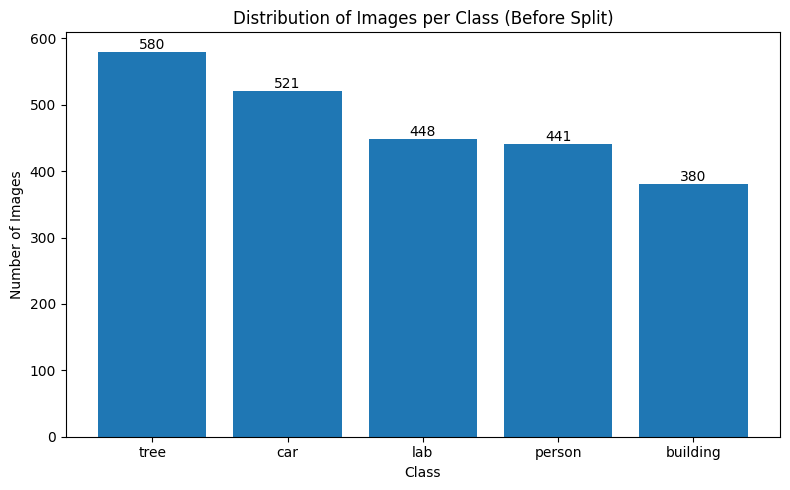

In [ ]:
import matplotlib.pyplot as plt

BASE_DIR = "/content/drive/MyDrive/deep_dataset"
classes = ['building', 'car', 'lab', 'person', 'tree']
IMAGE_EXTS = (".jpg", ".jpeg", ".png")

data = []

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)

    if not os.path.exists(cls_path):
        print(f"⚠️ Folder not found: {cls}")
        continue

    num_images = len([
        f for f in os.listdir(cls_path)
        if f.lower().endswith(IMAGE_EXTS)
        and os.path.isfile(os.path.join(cls_path, f))
    ])

    data.append((cls, num_images))

# ترتيب تنازلي حسب عدد الصور
data.sort(key=lambda x: x[1], reverse=True)

classes_sorted = [item[0] for item in data]
counts_sorted  = [item[1] for item in data]

plt.figure(figsize=(8, 5))
bars = plt.bar(classes_sorted, counts_sorted)

plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class (Before Split)")
plt.xticks(rotation=0)

# إظهار القيم فوق الأعمدة
for bar in bars:
    height = int(bar.get_height())
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        height,
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


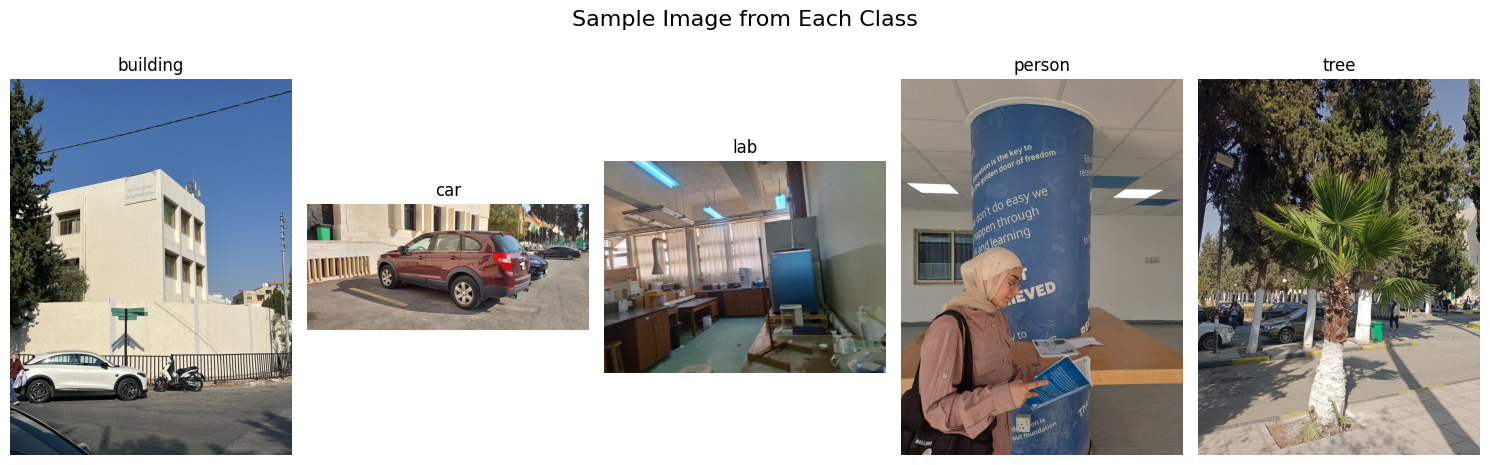

In [ ]:
import random

BASE_DIR = "/content/drive/MyDrive/deep_dataset"
classes = ['building', 'car', 'lab', 'person', 'tree']
IMAGE_EXTS = (".jpg", ".jpeg", ".png")

plt.figure(figsize=(15, 5))

for i, cls in enumerate(classes):
    cls_path = os.path.join(BASE_DIR, cls)

    # نختار فقط ملفات الصور
    images = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(IMAGE_EXTS)
    ]

    if len(images) == 0:
        print(f"⚠️ No images found in class: {cls}")
        continue

    img_name = random.choice(images)
    img_path = os.path.join(cls_path, img_name)

    with Image.open(img_path) as img:
        plt.subplot(1, len(classes), i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")

plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import shutil

BASE_DIR = "/content/drive/MyDrive/deep_dataset"
OUTPUT_DIR = "/content/drive/MyDrive/deep_dataset_splits"
classes = ['building', 'car', 'lab', 'person', 'tree']

SPLITS = (0.7, 0.15, 0.15)
IMAGE_EXTS = ('.jpg', '.jpeg', '.png')
SEED = 42

random.seed(SEED)

# حماية: لو التقسيم موجود نوقف
if os.path.exists(OUTPUT_DIR):
    print("⚠️ Dataset already split. Skipping splitting step.")
else:
    print(" Starting dataset split...")

    for split in ['train', 'val', 'test']:
        for cls in classes:
            os.makedirs(os.path.join(OUTPUT_DIR, split, cls), exist_ok=True)

    for cls in classes:
        cls_path = os.path.join(BASE_DIR, cls)
        images = [
            f for f in os.listdir(cls_path)
            if f.lower().endswith(IMAGE_EXTS)
        ]

        random.shuffle(images)

        n_total = len(images)
        n_train = int(n_total * SPLITS[0])
        n_val   = int(n_total * SPLITS[1])

        train_imgs = images[:n_train]
        val_imgs   = images[n_train:n_train + n_val]
        test_imgs  = images[n_train + n_val:]

        for img in train_imgs:
            shutil.copy(
                os.path.join(cls_path, img),
                os.path.join(OUTPUT_DIR, 'train', cls, img)
            )

        for img in val_imgs:
            shutil.copy(
                os.path.join(cls_path, img),
                os.path.join(OUTPUT_DIR, 'val', cls, img)
            )

        for img in test_imgs:
            shutil.copy(
                os.path.join(cls_path, img),
                os.path.join(OUTPUT_DIR, 'test', cls, img)
            )

        print(f"{cls}: train={len(train_imgs)}, val={len(val_imgs)}, test={len(test_imgs)}")

    print("✅ Dataset split completed successfully!")


⚠️ Dataset already split. Skipping splitting step.


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

BASE_SPLIT_DIR = "/content/drive/MyDrive/deep_dataset_splits"

train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_SPLIT_DIR}/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_SPLIT_DIR}/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_SPLIT_DIR}/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 1657 files belonging to 5 classes.
Found 355 files belonging to 5 classes.
Found 358 files belonging to 5 classes.
Classes: ['building', 'car', 'lab', 'person', 'tree']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


import numpy as np
from collections import Counter
# نجمع كل اللابلز من train
train_labels = []

for _, labels in train_ds:
    train_labels.extend(labels.numpy())

# نحسب عدد العينات بكل كلاس
counter = Counter(train_labels)
print("Samples per class:", counter)

num_classes = len(counter)
total_samples = len(train_labels)

# حساب class weights
class_weights = {
    cls: total_samples / (num_classes * count)
    for cls, count in counter.items()
}

print("Class Weights:", class_weights)


Samples per class: Counter({np.int32(4): 406, np.int32(1): 364, np.int32(2): 313, np.int32(3): 308, np.int32(0): 266})
Class Weights: {np.int32(0): 1.2458646616541353, np.int32(2): 1.0587859424920127, np.int32(1): 0.9104395604395604, np.int32(3): 1.075974025974026, np.int32(4): 0.816256157635468}


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import layers, models

NUM_CLASSES = 5

# Backbone
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze layers
base_model.trainable = False


# Model
inputs = layers.Input(shape=(224, 224, 3))

x = preprocess_input(inputs)
x = preprocess_input(x)                # ResNet preprocessing
x = base_model(x, training=False)      # Feature extractor

x = layers.GlobalAveragePooling2D()(x)

# Dropout أول
x = layers.Dropout(0.3)(x)

x = layers.Dense(256, activation="relu")(x)

# Dropout ثاني
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ add[0][0]         │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ add[0][0]         │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ add[0][0]         │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 5)         │      1,285 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# import numpy as np
# from collections import Counter

# # استخراج labels من train_ds
# y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0)

# counter = Counter(y_train)
# print("Samples per class:", counter)

# total_samples = len(y_train)
# num_classes = len(counter)

# class_weights = {
#     cls: total_samples / (num_classes * count)
#     for cls, count in counter.items()
# }

# print("Class weights:", class_weights)

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,              # عدد epochs بدون تحسّن
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 484s 9s/step - accuracy: 0.6670 - loss: 1.1283 - val_accuracy: 0.9352 - val_loss: 0.1890 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 397s 8s/step - accuracy: 0.9103 - loss: 0.2548 - val_accuracy: 0.9437 - val_loss: 0.1470 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 440s 8s/step - accuracy: 0.9219 - loss: 0.2016 - val_accuracy: 0.9408 - val_loss: 0.1617 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.9512 - loss: 0.1533 - val_accuracy: 0.9549 - val_loss: 0.1167 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 485s 8s/step - accuracy: 0.9368 - loss: 0.1559 - val_accuracy: 0.9437 - val_loss: 0.1711 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 406s 8s/step - accuracy: 0.9565 - loss: 0.1288 - val_accuracy: 0.9465 - val_loss: 0.1601 - learning_rate: 0.0010
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 429s 7s/step - accuracy: 0.9596 - loss: 0.1146 - val_acc

In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


In [ ]:
#Test Accuracy
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_true, y_pred))

labels = list(range(len(class_names)))

print(classification_report(
    y_true,
    y_pred,
    labels=labels,
    target_names=class_names,
    zero_division=0
))


Test Accuracy: 0.9497206703910615
              precision    recall  f1-score   support

    building       0.85      0.98      0.91        57
         car       0.96      0.94      0.95        79
         lab       0.97      0.97      0.97        68
      person       0.98      0.93      0.95        67
        tree       0.98      0.94      0.96        87

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.95      0.95      0.95       358



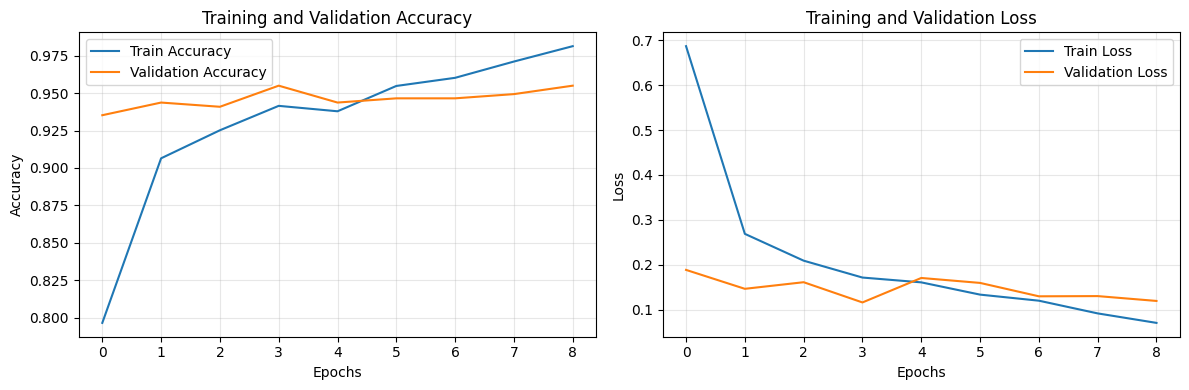

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True, alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid(True, alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


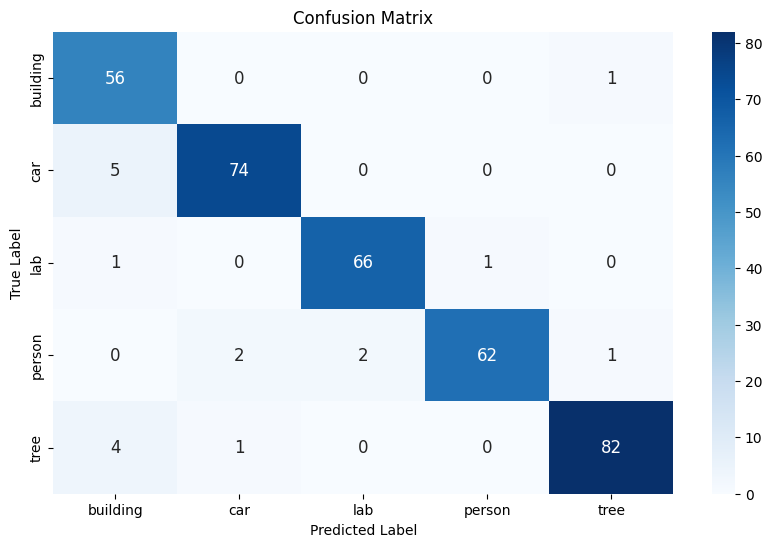

In [ ]:
#convision matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    annot_kws={"size": 12}
)


plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Number of misclassified images
import numpy as np

misclassified = []

idx = 0  # مؤشر عام

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    pred_labels = np.argmax(preds, axis=1)

    for i in range(len(labels)):
        if labels[i].numpy() != pred_labels[i]:
            misclassified.append((
                images[i].numpy(),
                labels[i].numpy(),
                pred_labels[i]
            ))
        idx += 1

print(f"Number of misclassified images: {len(misclassified)}")


Number of misclassified images: 18


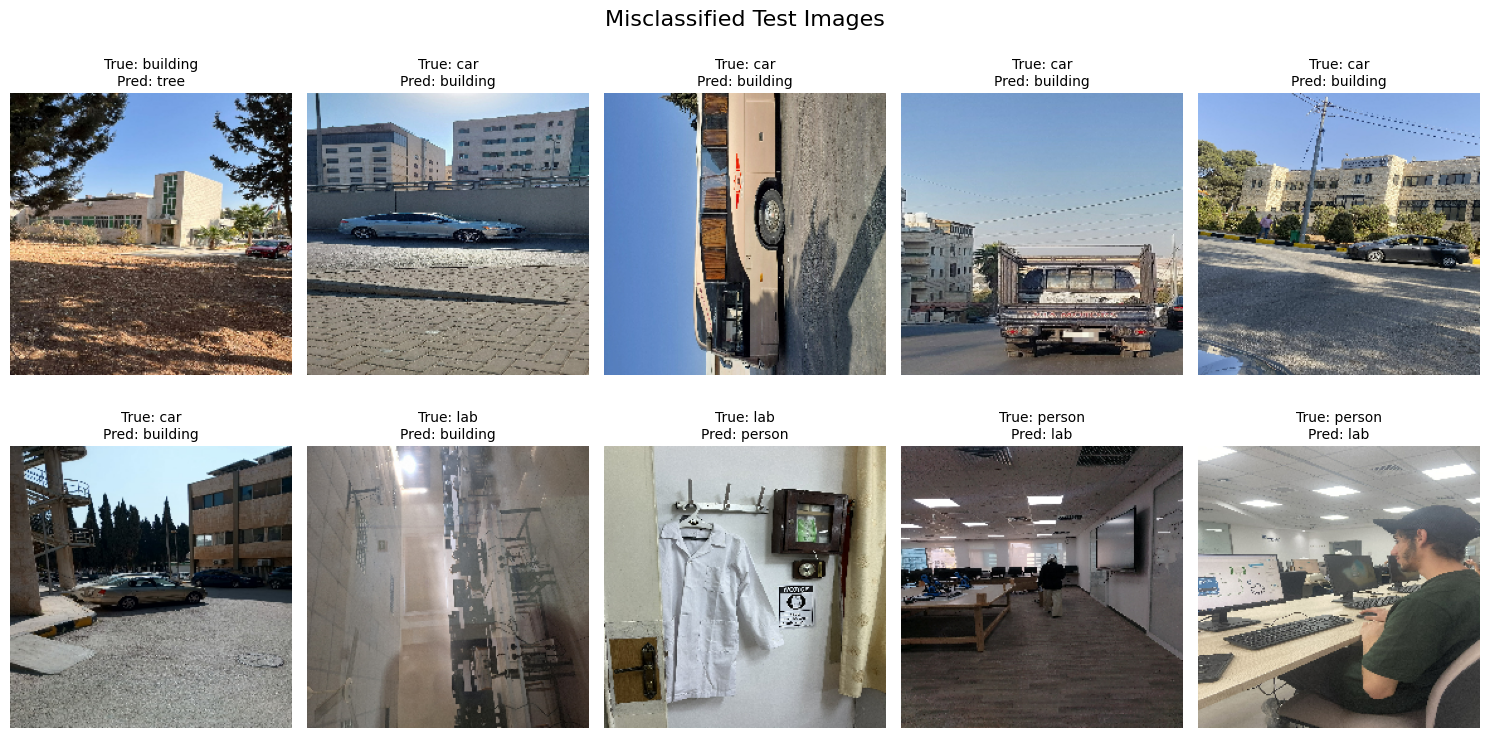

In [ ]:
import matplotlib.pyplot as plt

num_show = 10  # عدد الصور اللي  هتنعرض
plt.figure(figsize=(15, 8))

for i in range(min(num_show, len(misclassified))):
    img, true_label, pred_label = misclassified[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(
        f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
        fontsize=10
    )
    plt.axis("off")

plt.suptitle("Misclassified Test Images", fontsize=16)
plt.tight_layout()
plt.show()
